<a href="https://colab.research.google.com/github/R3gm/Colab-resources/blob/main/LoRA_Stable_Diffusion__Low_Rank_Adaptation_of_Large_Language_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low-Rank Adaptation of Large Language Models (LoRA)

| Description | Link |
| ----------- | ---- |
| 📙 Training, generation and utility scripts for Stable Diffusion | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/Linaqruf/kohya-trainer) |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/Colab-resources/) |


LoRA (Low-Rank Adaptation of Large Language Models) is a training method that enhances the training efficiency of large models while reducing memory consumption. It involves adding rank-decomposition weight matrices, called update matrices, to existing weights and training only these newly added weights. LoRA is commonly applied to the attention layers of models and helps prevent catastrophic forgetting while reducing the number of parameters. By using LoRA, fine-tuning tasks such as text-to-image generation and DreamBooth can achieve improved results with reduced memory requirements.

![outpaint](https://lightningaidev.wpengine.com/wp-content/uploads/2023/04/lora-3-300x217@2x.png)

# Install Requirements

In [1]:
#@markdown Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [ ]:
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/examples/dreambooth/train_dreambooth_lora.py
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers 

# config accelerate
!accelerate config default
from accelerate.utils import write_basic_config
write_basic_config()

# Login to HuggingFace 🤗

In [ ]:
!huggingface-cli login

# Settings and run

- This is the default configuration

In [21]:
MODEL_NAME="runwayml/stable-diffusion-v1-5"    # pretrained_model_name_or_path_to_use, can change it
INSTANCE_DIR="/content/images"    #    directory of files
OUTPUT_DIR="/content/output"    # directory of output, after the training

In [4]:
#@title Upload your images

from google.colab import files
!mkdir images
!mkdir output
%cd images/
uploaded = files.upload()
%cd ..

[Errno 2] No such file or directory: 'images/'
/content


Saving alvan-nee-9M0tSjb-cpA-unsplash.jpeg to alvan-nee-9M0tSjb-cpA-unsplash.jpeg
Saving alvan-nee-bQaAJCbNq3g-unsplash.jpeg to alvan-nee-bQaAJCbNq3g-unsplash.jpeg
Saving alvan-nee-brFsZ7qszSY-unsplash.jpeg to alvan-nee-brFsZ7qszSY-unsplash.jpeg
Saving alvan-nee-eoqnr8ikwFE-unsplash.jpeg to alvan-nee-eoqnr8ikwFE-unsplash.jpeg
Saving alvan-nee-Id1DBHv4fbg-unsplash.jpeg to alvan-nee-Id1DBHv4fbg-unsplash.jpeg
/


# Train
- after run the cell in `wandb` set the option 3 if not want to configure the visuaization of the results

In [35]:
!accelerate launch train_dreambooth_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a photo of sks dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --checkpointing_steps=100 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=500 \
  --validation_prompt="A photo of sks dog in a bucket" \
  --validation_epochs=50 \
  --seed="0" 
  #--report_to="wandb" \ # desactivate
  #--push_to_hub

2023-06-01 22:31:36.833490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-01 22:31:41.759483: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:258: FutureWarning: `logging_dir` is deprecated and will be removed in version 0.18.0 of 🤗 Accelerate. Use `project_dir` instead.
  warnings.warn(
06/01/2023 22:31:45 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
{'clip_sample_range', 'dynamic_thresholding_ratio', 'variance_type', 'thresholding', 'sample_max_value', 'prediction_type'} was not found in config. Values will be initialized to default values.
{'scaling_factor'} was 

# Inference

In [36]:
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import torch

pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.15.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [49]:
# Load the adapter layers into the UNet (W + αΔW)
# More info in https://huggingface.co/docs/diffusers/api/loaders#diffusers.loaders.UNet2DConditionLoadersMixin.load_attn_procs
pipe.unet.load_attn_procs(f"{OUTPUT_DIR}")

  0%|          | 0/25 [00:00<?, ?it/s]

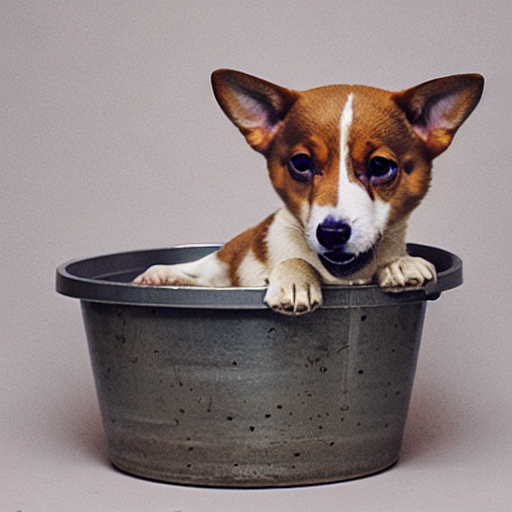

In [93]:
# Generate a image
image = pipe("A picture of a sks dog in a bucket", num_inference_steps=25).images[0]
image

#  LoRA weights and Base Model Weights: Exploring (α) Scale Values from 0 to 1 
`(W + αΔW)`

A (α) scale value of 0 disregards LoRA weights (ΔW) and uses only the base model weights (W), while a scale value of 1 excludes the base model weights and utilizes only the fully finetuned LoRA weights. Intermediate values blend the two weights.



  0%|          | 0/25 [00:00<?, ?it/s]

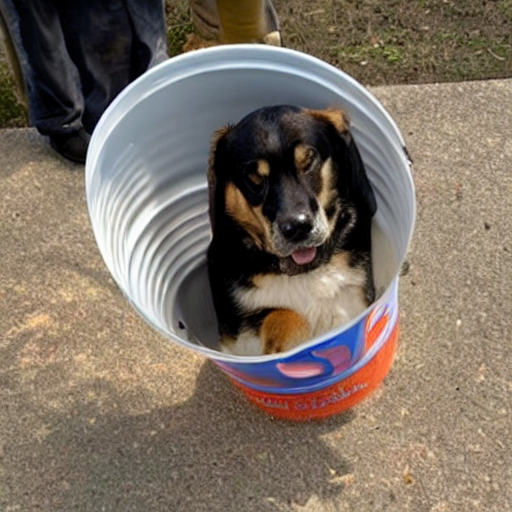

In [56]:
# Using 0 weight for LoRA and all weights from the base model, discarding the contribution of LoRA in the final model.
image = pipe(
    "A picture of a sks dog in a bucket", 
    num_inference_steps=25, 
    guidance_scale=7.5, 
    cross_attention_kwargs={"scale": 0.0}
).images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

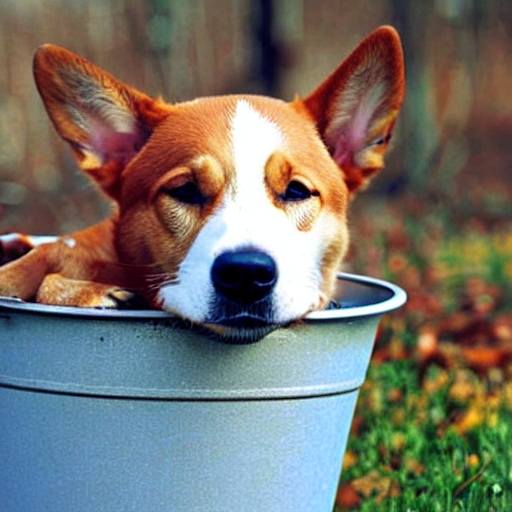

In [55]:
# use half the weights from the LoRA finetuned model and half the weights from the base model
image = pipe(
    "A picture of a sks dog in a bucket", 
    num_inference_steps=25, 
    guidance_scale=7.5, 
    cross_attention_kwargs={"scale": 0.5}
).images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

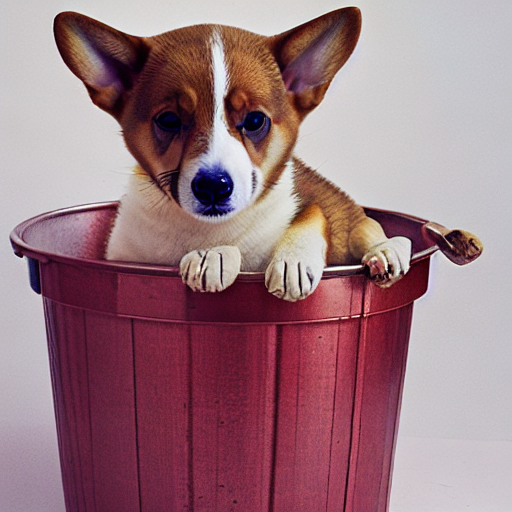

In [59]:
# use the weights from the fully finetuned LoRA model
image = pipe("A picture of a sks dog in a bucket", 
             num_inference_steps=25, 
             guidance_scale=7.5).images[0]
image

  0%|          | 0/24 [00:00<?, ?it/s]

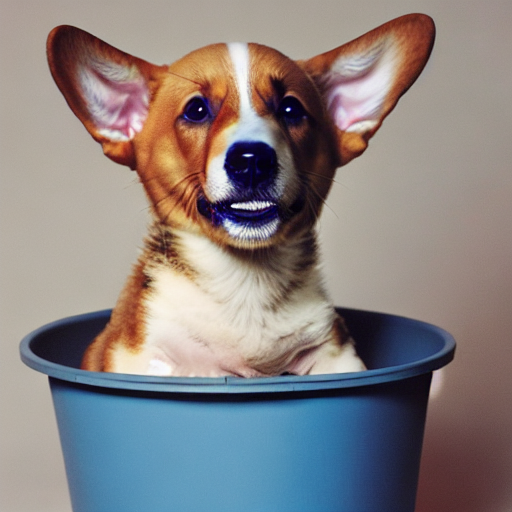

  0%|          | 0/24 [00:00<?, ?it/s]

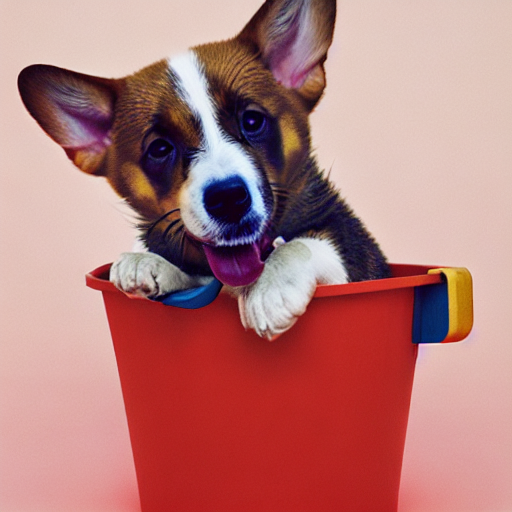

  0%|          | 0/24 [00:00<?, ?it/s]

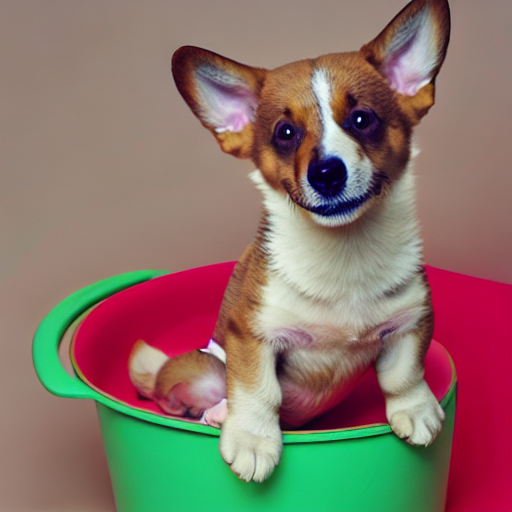

  0%|          | 0/24 [00:00<?, ?it/s]

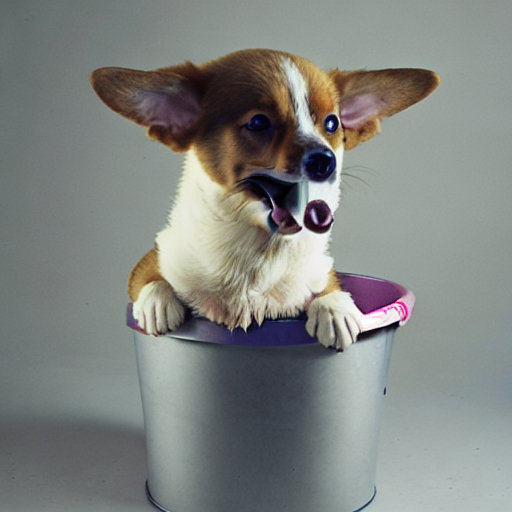

In [92]:
#@title Run for generating images.

prompt = "photo of sks dog in a bucket" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
num_samples = 4 #@param {type:"number"}
guidance_scale = 7.5 #@param {type:"number"}
num_inference_steps = 24 #@param {type:"number"}
height = 512 #@param {type:"number"}
width = 512 #@param {type:"number"}
ALFA_SCALE = 0.9 #@param {type:"slider", min:0, max:1, step:0.1}

for sample in range(num_samples):

    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        #num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        #generator=None
        cross_attention_kwargs={"scale":ALFA_SCALE}
    ).images

    display(images[0])

# References
- https://github.com/cloneofsimo/lora
- https://huggingface.co/docs/diffusers/training/lora
- https://aituts.com/stable-diffusion-lora/
- https://github.com/ShivamShrirao/diffusers/tree/main/examples/dreambooth
- https://lightning.ai/pages/community/tutorial/lora-llm/